In [1]:
import skimage
import tifffile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
from scipy.optimize import curve_fit
from matplotlib import rcParams
from statsmodels.stats.weightstats import ttest_ind
from statannotations.Annotator import Annotator
from math import floor
rcParams['figure.dpi'] = 250
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 12

In [2]:

data_dirs = {
    'DIV11' : 
    Path('/lab/processed-data/230303_iN_B5_DIV11_LiveCell/iN_B5_D11_LiveCell_20xH2O__2023-03-03T14_21_01-Measurement 1'),
    'DIV14' :
    Path('/lab/processed-data/230227_iN_B4_DIV14_LiveCell/1__2023-02-27T21_03_45-Measurement 4'),
    'DIV16_10x' : 
    Path('/lab/processed-data/230215_BC_Live/1__2023-02-15T17_25_23-Measurement 2'),
    'DIV16_63x' : 
    Path('/lab/processed-data/230215_BC_Live/2__2023-02-15T18_09_38-Measurement 1'),
    'DIV28' :
    Path('/lab/processed-data/230227_iN_B3_DIV28_LiveCell/1__2023-02-27T21_51_31-Measurement 5'),
    'DIV31' : 
    Path('/lab/processed-data/230302_iN_B3_DIV31_MG132_LiveCell/iN_B3_DIV31_MG132__2023-03-02T15_25_55-Measurement 1'),
    'DIV31_40x' : 
    Path('/lab/processed-data/230302_iN_B3_DIV31_MG132_LiveCell/iN_B3_DIV31_MG132_40xH2O__2023-03-02T16_07_40-Measurement 1'),
}

/tmp/ipykernel_267386/1020985512.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['FileName_NeuO_pre_illum', 'crispr', 'treatment', 'concentration']).mean()
/tmp/ipykernel_267386/1020985512.py:38: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
/tmp/ipykernel_267386/1020985512.py:38: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
/tmp/ipykernel_267386/1020985512.py:38: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
/tmp/ipykernel_267386/1020985512.py:38: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


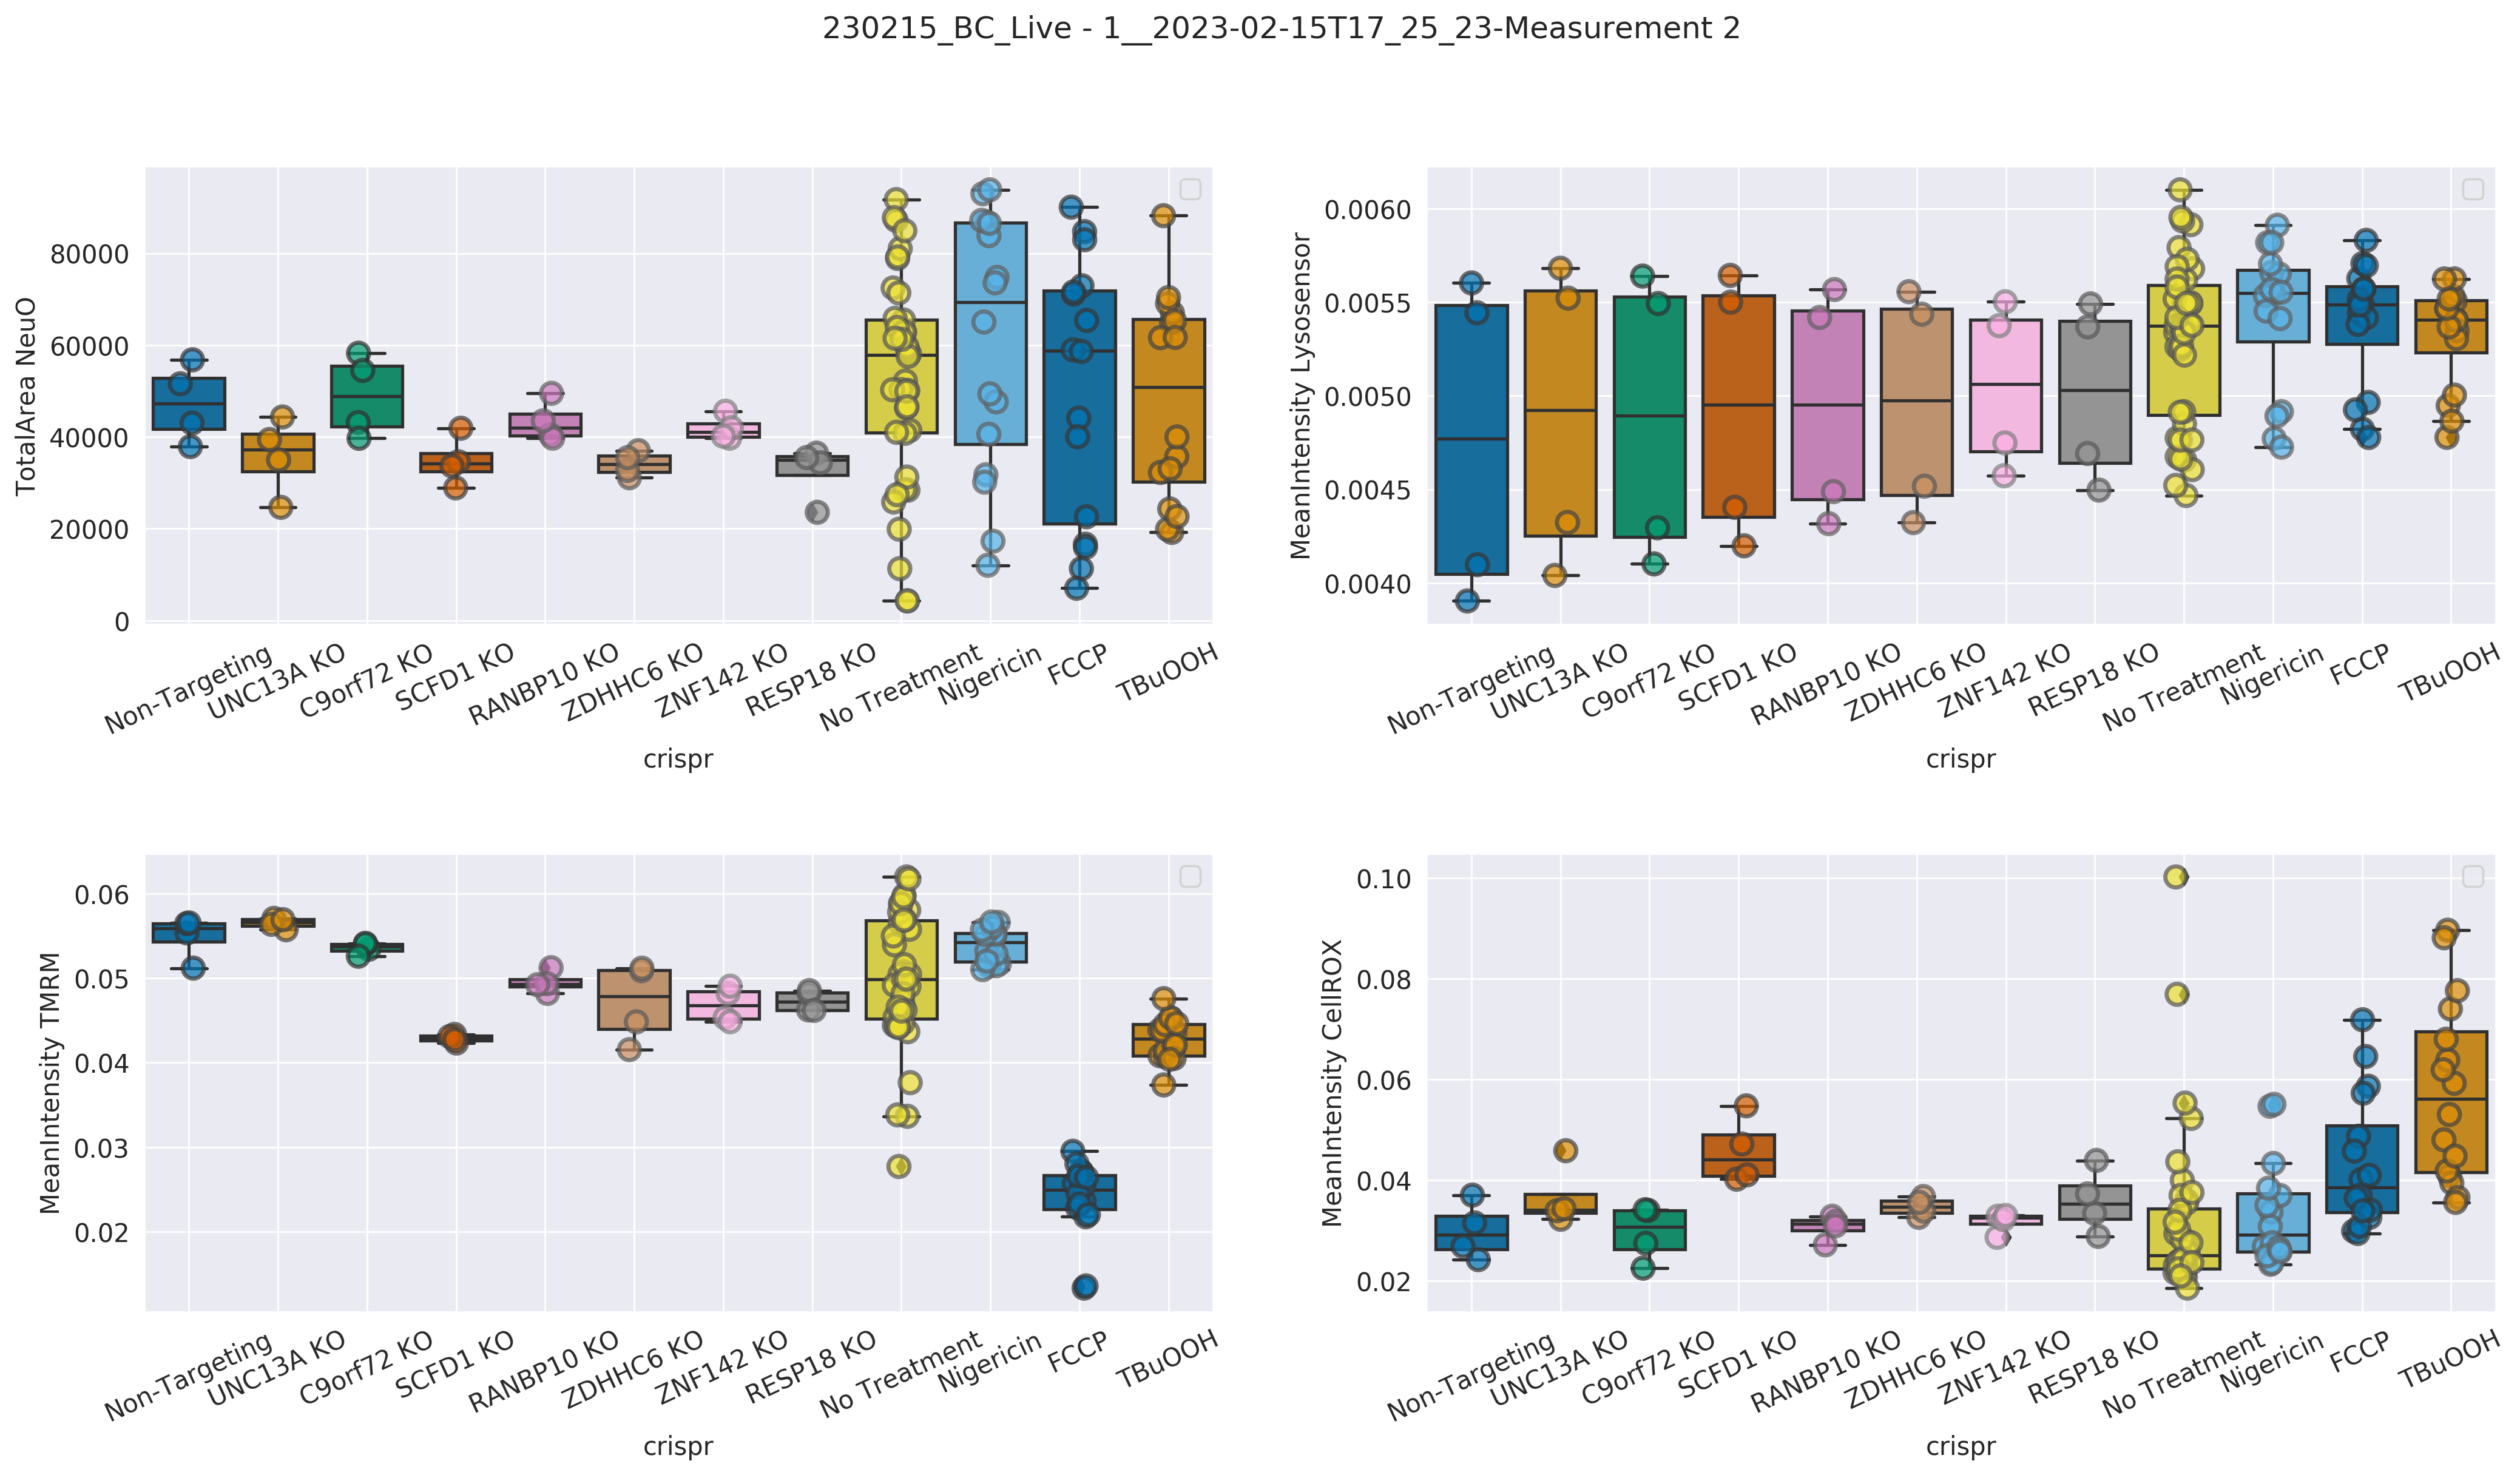

In [3]:
data_dir = data_dirs['DIV16_10x']
platemap = pd.read_csv(data_dir / 'platemap.csv')
data = pd.read_csv(data_dir / '2023-02-28_soma_segment' / '2023-02-28_soma_segment_Image.csv')

# Set filename and well position
data['well_position'] = data['FileName_NeuO_pre_illum'].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
data = data.merge(platemap, on='well_position')
# data = data.groupby(['well_position', 'crispr']).mean()
data = data.groupby(['FileName_NeuO_pre_illum', 'crispr', 'treatment', 'concentration']).mean()
data = data.reset_index()

measurements = [
    'Intensity_TotalArea_NeuO_masked',
    'Intensity_MeanIntensity_Lysosensor_masked',
    'Intensity_MeanIntensity_TMRM_masked',
    'Intensity_MeanIntensity_CellROX_masked'
]

sns.set_style('darkgrid')
fig, axs = plt.subplots(2,2)

for i_m, m in enumerate(measurements):

    axs_row = floor(i_m/2)
    axs_col = i_m % 2

    sns.boxplot(
        data=data, 
        x='crispr', 
        # x='concentration',
        y=m, 
        palette='colorblind',
        # hue='crispr',
        ax=axs[axs_row, axs_col]
    )
    sns.stripplot(
        data=data, 
        x='crispr', 
        # x='concentration',
        y=m, 
        palette='colorblind', 
        # hue='crispr',
        # dodge=True,
        linewidth=2, 
        size=10, 
        alpha=0.7,
        ax=axs[axs_row, axs_col])
    
    axs[axs_row, axs_col].tick_params(axis='x', rotation=25)
    axs[axs_row, axs_col].set_ylabel(m.split('_')[1] + ' ' + m.split('_')[2])
    axs[axs_row, axs_col].xaxis.grid(True)
    axs[axs_row, axs_col].legend('')
    
plt.suptitle(data_dir.parents[0].name + ' - ' + data_dir.name)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

/tmp/ipykernel_267386/1994904754.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['well_position', 'row', 'col', 'crispr']).mean()


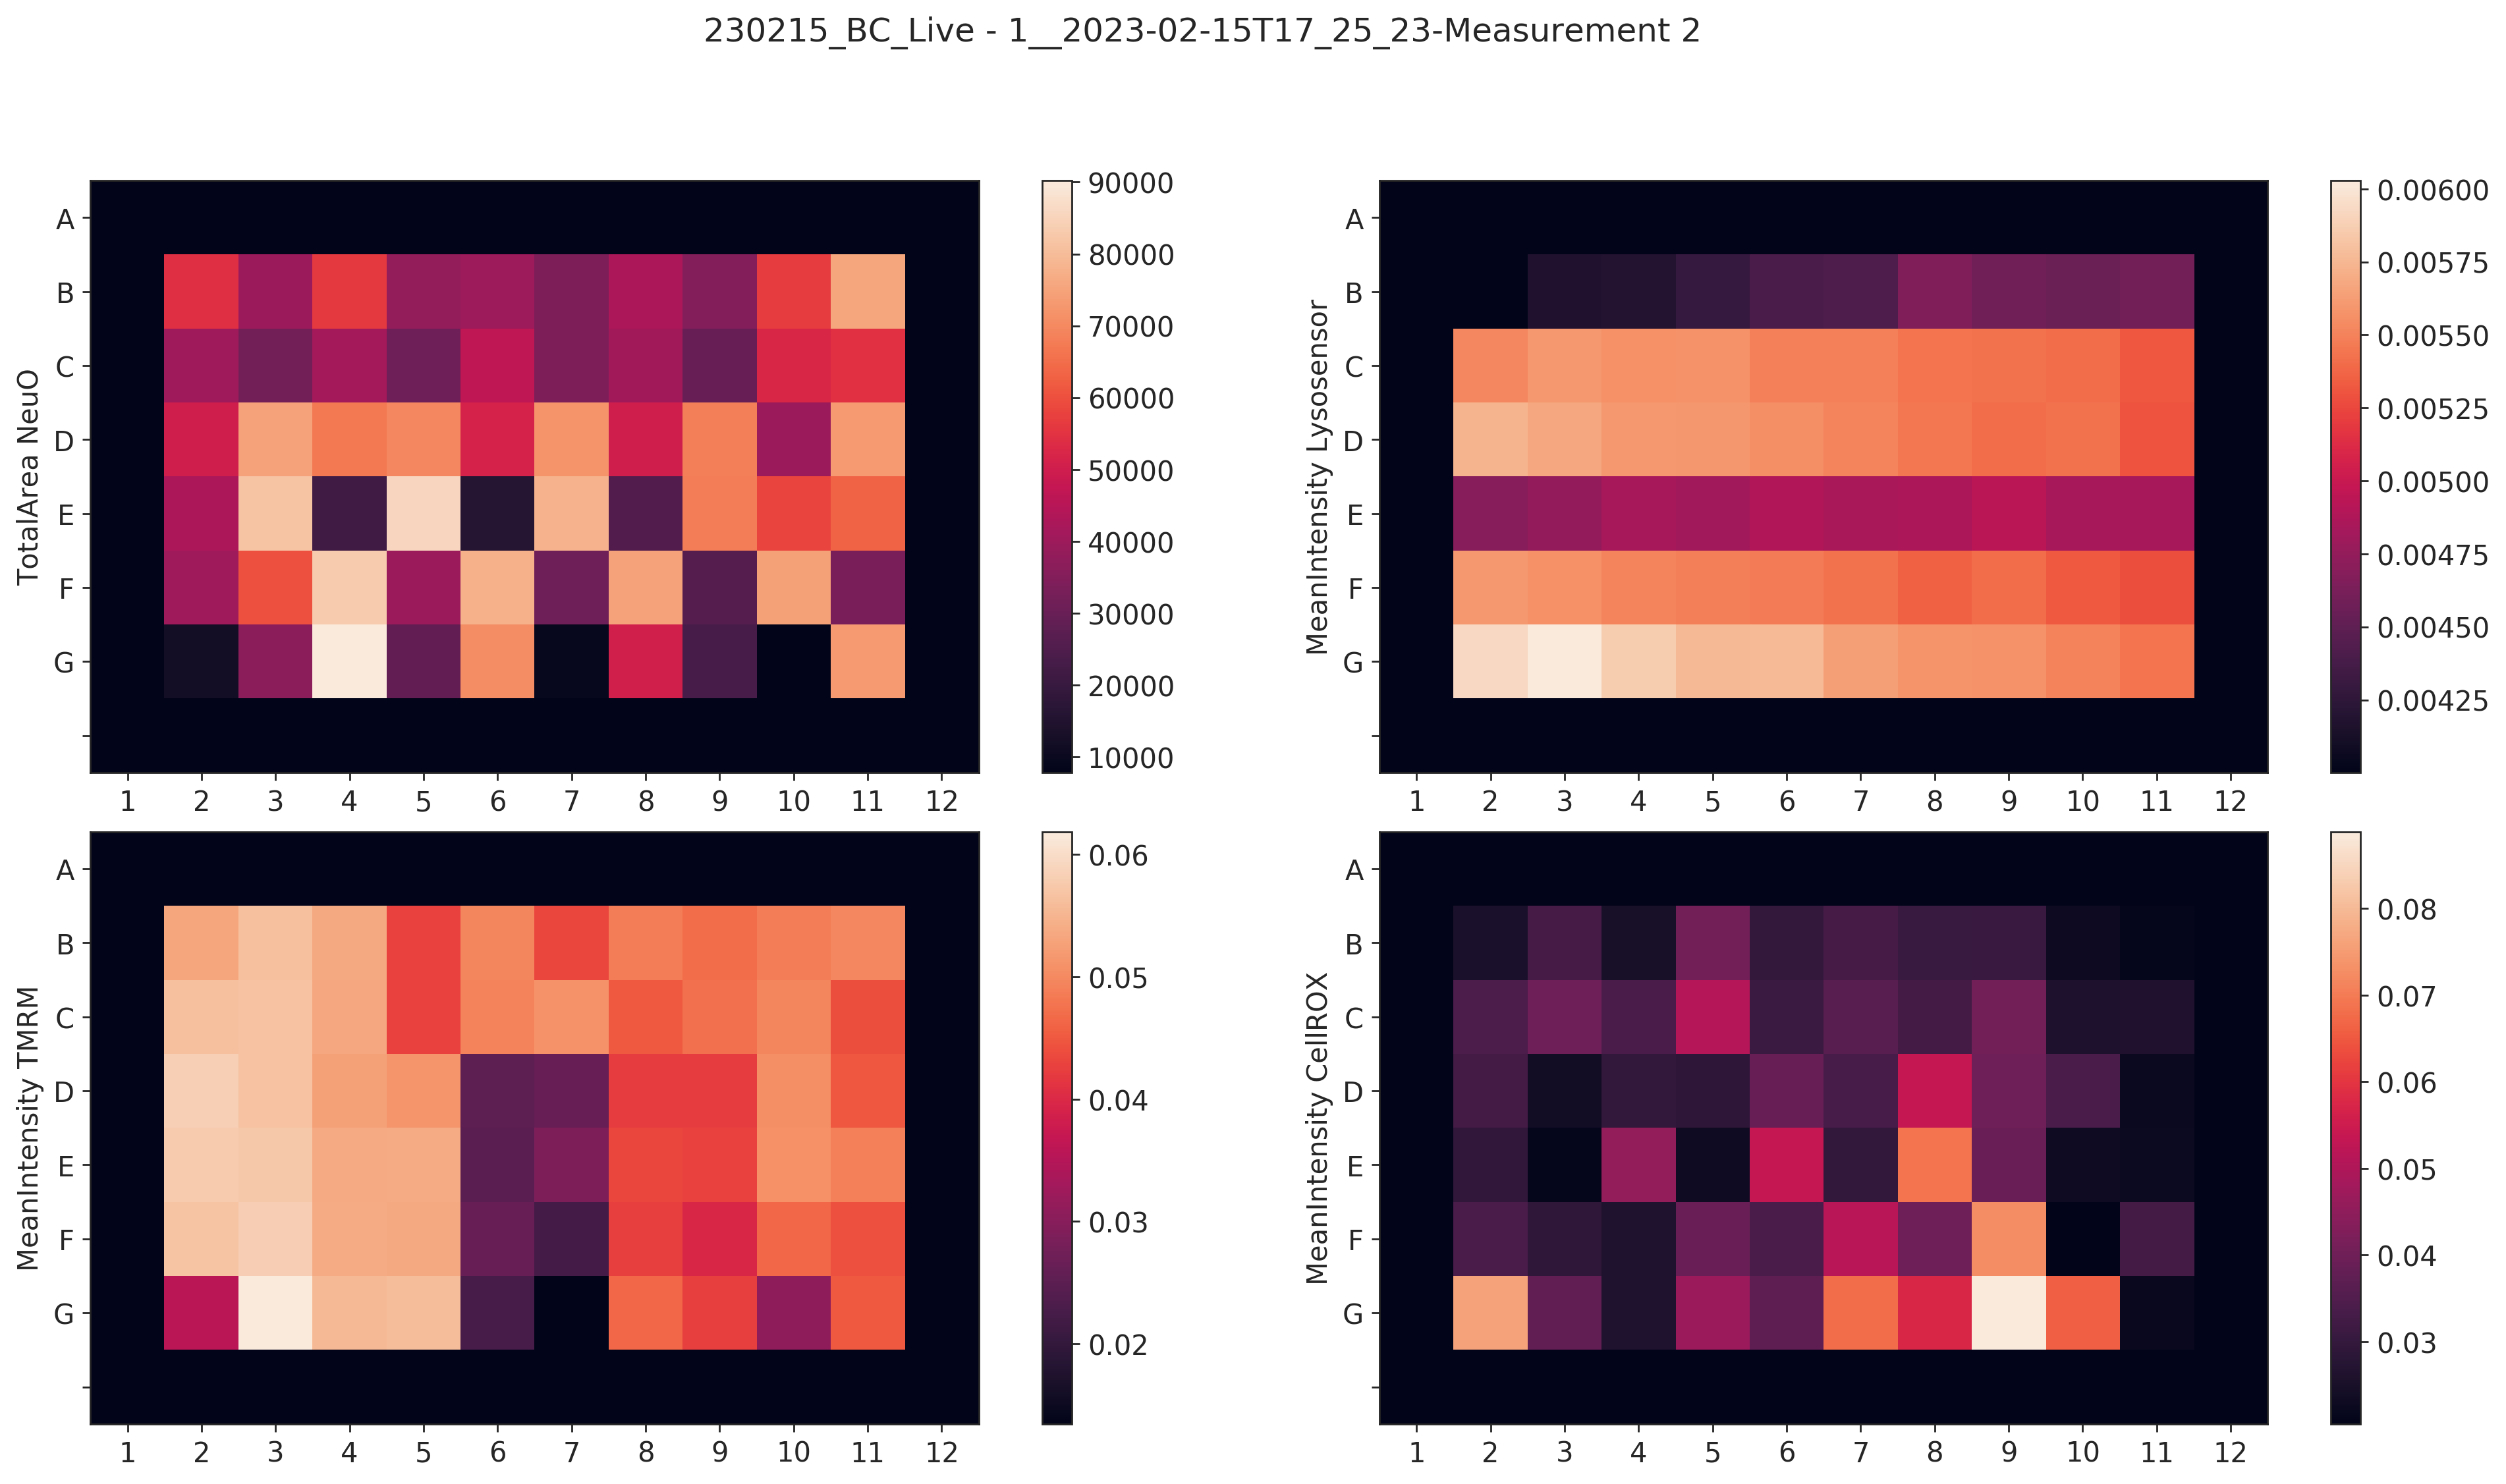

In [4]:
data_dir = data_dirs['DIV16_10x']
platemap = pd.read_csv(data_dir / 'platemap.csv')
data = pd.read_csv(data_dir / '2023-02-28_soma_segment' / '2023-02-28_soma_segment_Image.csv')
filename = 'FileName_NeuO_pre_illum'

# Set filename and well position
data['well_position'] = data['FileName_NeuO_pre_illum'].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
# Set filename and well position
plate = np.zeros([8, 12])
data['well_position'] = data[filename].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
data['row'] = data[filename].apply(
    lambda fname : int(fname[1:3])
)
data['col'] = data[filename].apply(
    lambda fname : int(fname[4:6])
)
data = data.merge(platemap, on='well_position')
data = data.groupby(['well_position', 'row', 'col', 'crispr']).mean()
# data = data.groupby(['FileName_NeuO_pre_illum', 'crispr', 'treatment', 'concentration']).mean()
data = data.reset_index()

measurements = [
    'Intensity_TotalArea_NeuO_masked',
    'Intensity_MeanIntensity_Lysosensor_masked',
    'Intensity_MeanIntensity_TMRM_masked',
    'Intensity_MeanIntensity_CellROX_masked'
]

sns.set_style('ticks')
fig, axs = plt.subplots(2,2)

for i_m, m in enumerate(measurements):

    axs_row = floor(i_m/2)
    axs_col = i_m % 2

    plate[data['row']-1, data['col']-1] = data[m]
    vmin = plate[plate != plate.min()].min()
    im = axs[axs_row, axs_col].imshow(plate, vmin=vmin)
    axs[axs_row, axs_col].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
    axs[axs_row, axs_col].set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12])
    axs[axs_row, axs_col].set_yticks([0,1,2,3,4,5,6,7])
    axs[axs_row, axs_col].set_yticklabels(['A','B','C','D','E','F','G'])
    plt.colorbar(im, ax=axs[axs_row, axs_col])
    # plt.title(data_dir.parents[0].name + ' - ' + data_dir.name)

    # axs[axs_row, axs_col].tick_params(axis='x', rotation=25)
    axs[axs_row, axs_col].set_ylabel(m.split('_')[1] + ' ' + m.split('_')[2])
    # axs[axs_row, axs_col].xaxis.grid(True)
    # axs[axs_row, axs_col].legend('')
    
plt.suptitle(data_dir.parents[0].name + ' - ' + data_dir.name)
plt.subplots_adjust(wspace=0.02, hspace=0.1)